In [100]:
import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt
import growth_simulations as g
import weakref
import scipy.optimize
import time
from matplotlib import rc
rc('text', usetex=True)
font = {'weight' : 'bold',
        'size'   : 22}	
plt.rc('font', **font)
import seaborn as sns
from sklearn.neighbors import KernelDensity
# from sklearn.grid_search import GridSearchCV
# from sklearn.cross_validation import LeaveOneOut
import sys

In [101]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
%autoreload 2

# Tuning the synthesis rate of Whi5 to give the same average cell sizes

In [143]:
path = './whi5_pert_expt_simulation/noisy_rate_model/tuning_synth_rate/'
temp_vals = []
kw = np.linspace(0.1, 1.0, num=19)
for ind in range(19):
    data_ext = 'model16_av_vb_right_rate{0}.npy'.format(ind)
    temp_vals.append(np.load(path+data_ext))

In [144]:
std_vec=np.load('./whi5_pert_expt_simulation/noisy_rate_model/model15_std_vb1.npy')
av_vec=np.load('./whi5_pert_expt_simulation/noisy_rate_model/model15_av_vb1.npy')
cv_vec=np.load('./whi5_pert_expt_simulation/noisy_rate_model/model15_cv_vb1.npy')

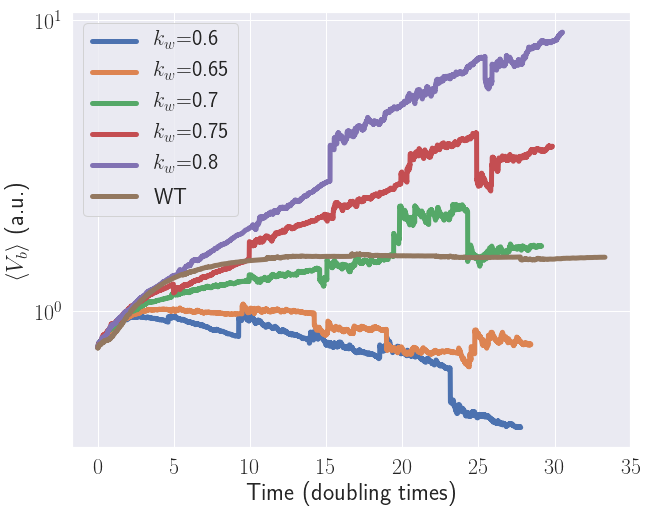

<Figure size 432x288 with 0 Axes>

In [147]:
fig=plt.figure(figsize=[10,8])
sns.set(font_scale=2.0)
current_palette = sns.color_palette()
for ind in range(10,15,1):
    temp2 = temp_vals[ind]
    tvec2 = np.linspace(0.0,temp2.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp2.shape[1])
    plt.semilogy(tvec2,np.mean(temp2[:,:],axis=0),label='$k_w$={0}'.format(kw[ind]),lw=5.0)
temp1 = av_vec
tvec2 = np.linspace(0.0,temp1.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp1.shape[1])
plt.semilogy(tvec2,np.mean(temp1[:,:],axis=0),label='WT',lw=5.0)
# plt.xlim(xmin=0,xmax=20)
plt.ylabel(r'$\langle V_{b} \rangle$ (a.u.)')
plt.xlabel('Time (doubling times)')
plt.legend()
# fig.savefig('./whi5_pert_expt_simulation/noisy_rate_model/av_volumes.png',bbox_inches='tight',dpi=300)
# fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/noisy_rate_model/av_volumes.png',bbox_inches='tight',dpi=300)
plt.show()
plt.clf()

# Clearly around $k_w=0.65-0.7$ is the sweet spot

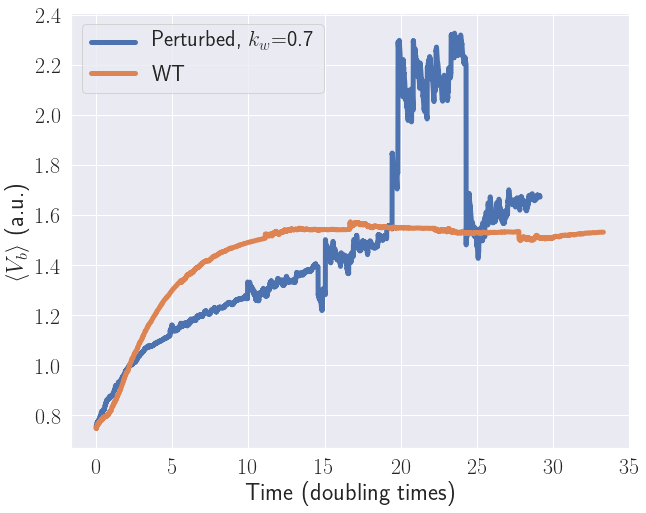

<Figure size 432x288 with 0 Axes>

In [148]:
fig=plt.figure(figsize=[10,8])
sns.set(font_scale=2.0)
current_palette = sns.color_palette()
ind=12
temp2 = temp_vals[ind]
tvec2 = np.linspace(0.0,temp2.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp2.shape[1])
plt.plot(tvec2,np.mean(temp2[:,:],axis=0),label='Perturbed, $k_w$={0}'.format(kw[ind]),lw=5.0)
temp1 = av_vec
tvec2 = np.linspace(0.0,temp1.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp1.shape[1])
plt.plot(tvec2,np.mean(temp1[:,:],axis=0),label='WT',lw=5.0)
# plt.xlim(xmin=0,xmax=20)
plt.ylabel(r'$\langle V_{b} \rangle$ (a.u.)')
plt.xlabel('Time (doubling times)')
plt.legend()
# fig.savefig('./whi5_pert_expt_simulation/noisy_rate_model/av_volumes.png',bbox_inches='tight',dpi=300)
# fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/noisy_rate_model/av_volumes.png',bbox_inches='tight',dpi=300)
plt.show()
plt.clf()

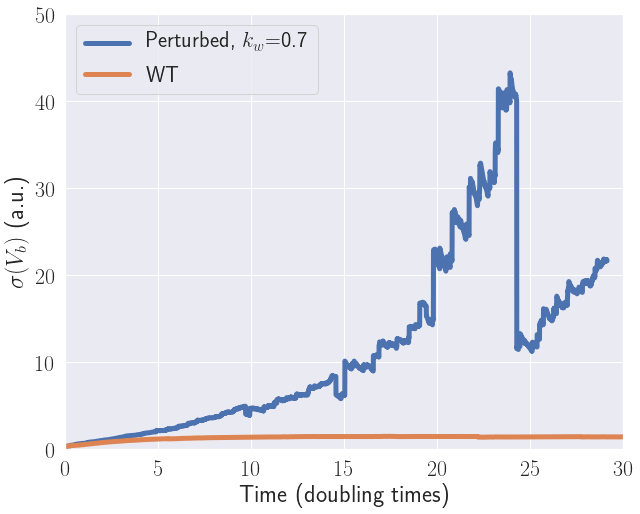

<Figure size 432x288 with 0 Axes>

In [149]:
path = './whi5_pert_expt_simulation/noisy_rate_model/tuning_synth_rate/'
kw = np.linspace(0.1, 1.0, num=19)
ind=12
data_ext = 'model16_std_vb_right_rate{0}.npy'.format(ind)
temp2 = np.load(path+data_ext)
fig=plt.figure(figsize=[10,8])
sns.set(font_scale=2.0)
current_palette = sns.color_palette()
tvec2 = np.linspace(0.0,temp2.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp2.shape[1])
plt.plot(tvec2,np.mean(temp2[:,:],axis=0),label='Perturbed, $k_w$={0}'.format(kw[ind]),lw=5.0)
temp1 = std_vec
tvec2 = np.linspace(0.0,temp1.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp1.shape[1])
plt.plot(tvec2,np.mean(temp1[:,:],axis=0),label='WT',lw=5.0)
plt.xlim(xmin=0,xmax=30)
plt.ylim(ymin=0,ymax=50)
plt.ylabel(r'$\sigma( V_{b})$ (a.u.)')
plt.xlabel('Time (doubling times)')
plt.legend()
# fig.savefig('./whi5_pert_expt_simulation/noisy_rate_model/av_volumes.png',bbox_inches='tight',dpi=300)
# fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/noisy_rate_model/av_volumes.png',bbox_inches='tight',dpi=300)
plt.show()
plt.clf()

In [159]:
np.nonzero([0,1,2,0])[0]
np.random.randint(0,10,size=1)[0]

6

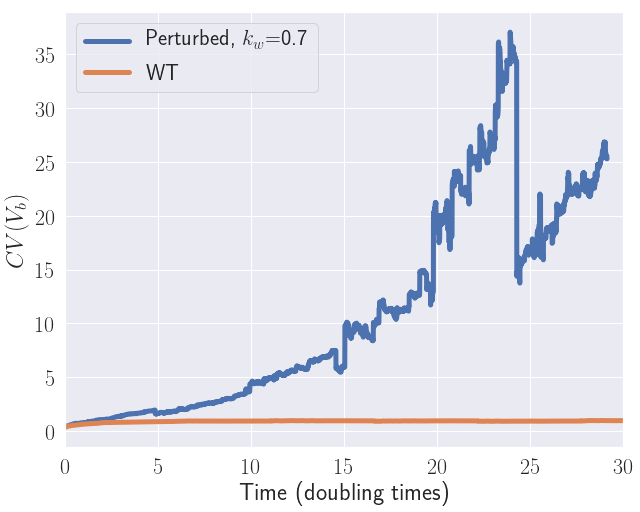

<Figure size 432x288 with 0 Axes>

In [150]:
path = './whi5_pert_expt_simulation/noisy_rate_model/tuning_synth_rate/'
kw = np.linspace(0.1, 1.0, num=19)
ind=12
data_ext = 'model16_cv_vb_right_rate{0}.npy'.format(ind)
temp2 = np.load(path+data_ext)
temp1 = cv_vec
fig=plt.figure(figsize=[10,8])
sns.set(font_scale=2.0)
current_palette = sns.color_palette()
tvec2 = np.linspace(0.0,temp2.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp2.shape[1])
plt.plot(tvec2,np.mean(temp2[:,:],axis=0),label='Perturbed, $k_w$={0}'.format(kw[ind]),lw=5.0)
tvec2 = np.linspace(0.0,temp1.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp1.shape[1])
plt.plot(tvec2,np.mean(temp1[:,:],axis=0),label='WT',lw=5.0)
plt.xlim(xmin=0,xmax=30)
plt.ylabel(r'$CV( V_{b})$')
plt.xlabel('Time (doubling times)')
plt.legend()
# fig.savefig('./whi5_pert_expt_simulation/noisy_rate_model/av_volumes.png',bbox_inches='tight',dpi=300)
# fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/noisy_rate_model/av_volumes.png',bbox_inches='tight',dpi=300)
plt.show()
plt.clf()

# Now we try to adjust the code so that we are using dilution rather than bulk culture growth

In [177]:
par_vals = {'nstep': 2000, 'dt': 0.01, 'modeltype': 15, 'delta': 1.0, 'lambda': 1.0,'r':0.5,'lambda_std':0.0, 'Nmax':5000}
par_vals['n']=1
par_vals['k']=2.0
par_vals['kw']=3.0  # for low rate k relative to growth required in G1 to bring daughters in line with mothers.
temp_vals = []
init_pop = g.starting_popn(par_vals)
c, obs,vol_vals = g.discr_time_dilution(par_vals, init_pop)

Reached step n=0, population size 100, total number of tracked cells 100, number of diluted cells 0
Reached step n=100, population size 186, total number of tracked cells 272, number of diluted cells 0
Reached step n=200, population size 322, total number of tracked cells 544, number of diluted cells 0
Reached step n=300, population size 613, total number of tracked cells 1126, number of diluted cells 0
Reached step n=400, population size 1136, total number of tracked cells 2172, number of diluted cells 0
Reached step n=500, population size 2181, total number of tracked cells 4262, number of diluted cells 0
Reached step n=600, population size 4172, total number of tracked cells 8244, number of diluted cells 0
Reached step n=700, population size 5000, total number of tracked cells 14578, number of diluted cells 2339
Reached step n=800, population size 5000, total number of tracked cells 21222, number of diluted cells 5661
Reached step n=900, population size 5000, total number of tracked

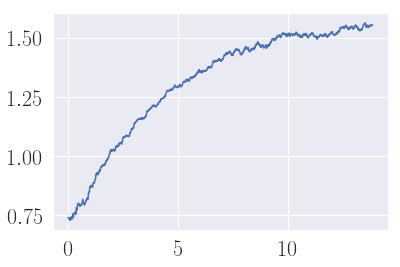

In [179]:
plt.plot(obs[1],obs[5])

# This appears to have more or less solved the problem of the extremely jumpy reseeding, so now we can re-run the same simulations but change the details to account for this dilution

In [228]:
std_vec=np.load('./whi5_pert_expt_simulation/noisy_rate_model/dilution_simulations/model15_std_vb_WT.npy')
av_vec=np.load('./whi5_pert_expt_simulation/noisy_rate_model/dilution_simulations/model15_av_vb_WT.npy')
cv_vec=np.load('./whi5_pert_expt_simulation/noisy_rate_model/dilution_simulations/model15_cv_vb_WT.npy')

std_vec_low=np.load('./whi5_pert_expt_simulation/noisy_rate_model/dilution_simulations/model16_std_vb_low_rate.npy')
av_vec_low=np.load('./whi5_pert_expt_simulation/noisy_rate_model/dilution_simulations/model16_av_vb_low_rate.npy')
cv_vec_low=np.load('./whi5_pert_expt_simulation/noisy_rate_model/dilution_simulations/model16_cv_vb_low_rate.npy')

std_vec_high=np.load('./whi5_pert_expt_simulation/noisy_rate_model/dilution_simulations/model16_std_vb_high_rate.npy')
av_vec_high=np.load('./whi5_pert_expt_simulation/noisy_rate_model/dilution_simulations/model16_av_vb_high_rate.npy')
cv_vec_high=np.load('./whi5_pert_expt_simulation/noisy_rate_model/dilution_simulations/model16_cv_vb_high_rate.npy')

std_vec_right=np.load('./whi5_pert_expt_simulation/noisy_rate_model/dilution_simulations/model16_std_vb_right_rate.npy')
av_vec_right=np.load('./whi5_pert_expt_simulation/noisy_rate_model/dilution_simulations/model16_av_vb_right_rate.npy')
cv_vec_right=np.load('./whi5_pert_expt_simulation/noisy_rate_model/dilution_simulations/model16_cv_vb_right_rate.npy')

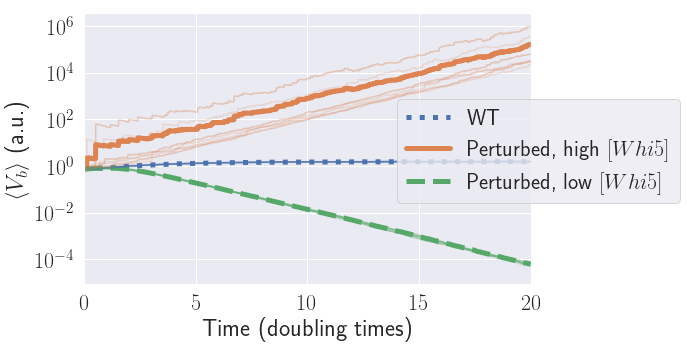

<Figure size 432x288 with 0 Axes>

In [263]:
fig=plt.figure(figsize=[8,5])
sns.set(font_scale=2.0)
current_palette = sns.color_palette()
temp1 = av_vec
tvec1 = np.linspace(0.0,temp1.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp1.shape[1])
temp2 = av_vec_low
tvec2 = np.linspace(0.0,temp2.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp2.shape[1])
plt.semilogy(tvec1,np.mean(temp1,axis=0),label='WT',lw=5.0, linestyle=':')
plt.semilogy(tvec2,np.mean(temp2[:,:],axis=0),label='Perturbed, high $[Whi5]$',lw=5.0, linestyle='-')
temp3 = av_vec_high
tvec3 = np.linspace(0.0,temp3.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp3.shape[1])
plt.semilogy(tvec3,np.mean(temp3,axis=0),label='Perturbed, low $[Whi5]$',lw=5.0, linestyle='--')
# temp4 = av_vec_right
# tvec4 = np.linspace(0.0,temp4.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp4.shape[1])
# plt.semilogy(tvec4,np.mean(temp4,axis=0),label='Perturbed',lw=5.0)
nums = np.random.randint(low=0,high=10,size=10)
for i0 in range(10):
    plt.semilogy(tvec1,temp1[nums[i0],:],alpha=0.2,color=current_palette[0])
    plt.semilogy(tvec2,temp2[nums[i0],:],alpha=0.2,color=current_palette[1])
    plt.semilogy(tvec3,temp3[nums[i0],:],alpha=0.2,color=current_palette[2])
#     plt.semilogy(tvec4,temp4[nums[i0],:],alpha=0.5,color=current_palette[3])
#     plt.semilogy(tvec2,temp2[i0,:],alpha=0.5)
# plt.fill_between(tvec2,np.mean(temp2,axis=0)-np.std(temp2,axis=0),np.mean(temp2,axis=0)+np.std(temp2,axis=0),alpha=0.5)
# plt.plot(tvec,std_vec,label='Std deviation in volume')
# plt.plot(tvec,std_vec,label='Std deviation in volume')
plt.xlim(xmin=0,xmax=20)
plt.ylabel(r'$\langle V_b\rangle$ (a.u.)')
plt.xlabel('Time (doubling times)')
plt.legend(loc=[0.7,0.3])
# fig.savefig('./whi5_pert_expt_simulation/noisy_rate_model/av_volumes.png',bbox_inches='tight',dpi=300)
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/noisy_rate_model/av_volumes.png',bbox_inches='tight',dpi=300)
plt.show()
plt.clf()

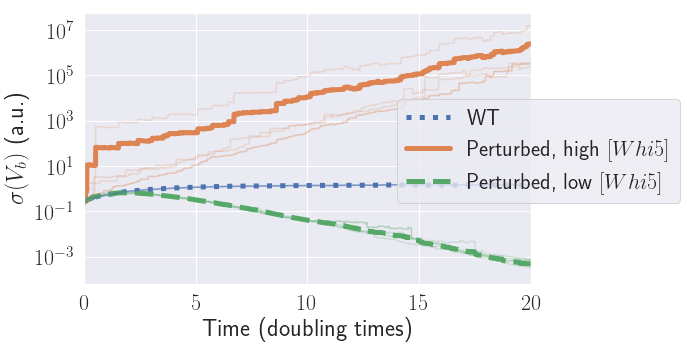

<Figure size 432x288 with 0 Axes>

In [261]:
fig=plt.figure(figsize=[8,5])
sns.set(font_scale=2.0)
current_palette = sns.color_palette()
temp1 = std_vec
tvec1 = np.linspace(0.0,temp1.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp1.shape[1])
temp2 = std_vec_low
tvec2 = np.linspace(0.0,temp2.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp2.shape[1])
plt.semilogy(tvec1,np.mean(temp1,axis=0),label='WT',lw=5.0, linestyle=':')
plt.semilogy(tvec2,np.mean(temp2[:,:],axis=0),label='Perturbed, high $[Whi5]$',lw=5.0, linestyle='-')
temp3 = std_vec_high
tvec3 = np.linspace(0.0,temp3.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp3.shape[1])
plt.semilogy(tvec3,np.mean(temp3,axis=0),label='Perturbed, low $[Whi5]$',lw=5.0, linestyle='--')
# temp4 = av_vec_right
# tvec4 = np.linspace(0.0,temp4.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp4.shape[1])
# plt.semilogy(tvec4,np.mean(temp4,axis=0),label='Perturbed',lw=5.0)
# nums = np.random.randint(low=0,high=10,size=10)
# xv,yv,ystd = tvec1,np.mean(temp1,axis=0),np.std(temp1,axis=0)
# plt.fill_between(xv, yv-ystd,yv+ystd,alpha=0.2,color=current_palette[0])
# xv,yv,ystd = tvec2,np.mean(temp2,axis=0),np.std(temp2,axis=0)
# plt.fill_between(xv, yv-ystd,yv+ystd,alpha=0.2,color=current_palette[1])
# xv,yv,ystd = tvec3,np.mean(temp3,axis=0),np.std(temp3,axis=0)
# plt.fill_between(xv, yv-ystd,yv+ystd,alpha=0.2,color=current_palette[1])
for i0 in range(5):
    plt.semilogy(tvec1,temp1[nums[i0],:],alpha=0.2,color=current_palette[0])
    plt.semilogy(tvec2,temp2[nums[i0],:],alpha=0.2,color=current_palette[1])
    plt.semilogy(tvec3,temp3[nums[i0],:],alpha=0.2,color=current_palette[2])
#     plt.semilogy(tvec4,temp4[nums[i0],:],alpha=0.5,color=current_palette[3])
#     plt.semilogy(tvec2,temp2[i0,:],alpha=0.5)
# plt.fill_between(tvec2,np.mean(temp2,axis=0)-np.std(temp2,axis=0),np.mean(temp2,axis=0)+np.std(temp2,axis=0),alpha=0.5)
# plt.plot(tvec,std_vec,label='Std deviation in volume')
# plt.plot(tvec,std_vec,label='Std deviation in volume')
plt.xlim(xmin=0,xmax=20)
plt.ylabel('$\sigma(V_b)$ (a.u.)')
plt.xlabel('Time (doubling times)')
plt.legend(loc=[0.70,0.3])
# fig.savefig('./whi5_pert_expt_simulation/noisy_rate_model/std_volumes.png',bbox_inches='tight',dpi=300)
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/noisy_rate_model/std_volumes.png',bbox_inches='tight',dpi=300)
plt.show()
plt.clf()

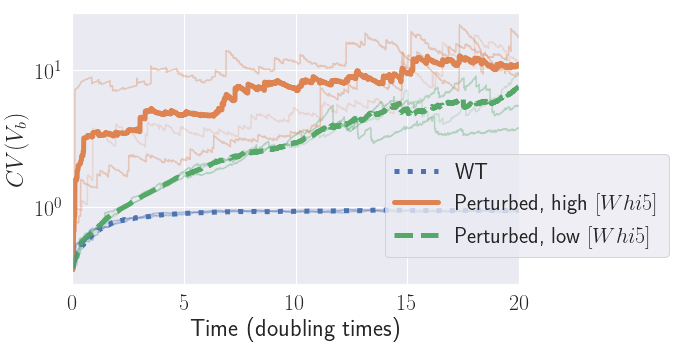

<Figure size 432x288 with 0 Axes>

In [268]:
fig=plt.figure(figsize=[8,5])
sns.set(font_scale=2.0)
current_palette = sns.color_palette()
temp1 = cv_vec
tvec1 = np.linspace(0.0,temp1.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp1.shape[1])
temp2 = cv_vec_low
tvec2 = np.linspace(0.0,temp2.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp2.shape[1])
plt.semilogy(tvec1,np.mean(temp1,axis=0),label='WT',lw=5.0, linestyle=':')
plt.semilogy(tvec2,np.mean(temp2[:,:],axis=0),label='Perturbed, high $[Whi5]$',lw=5.0, linestyle='-')
temp3 = cv_vec_high
tvec3 = np.linspace(0.0,temp3.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp3.shape[1])
plt.semilogy(tvec3,np.mean(temp3,axis=0),label='Perturbed, low $[Whi5]$',lw=5.0, linestyle='--')
# temp4 = av_vec_right
# tvec4 = np.linspace(0.0,temp4.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp4.shape[1])
# plt.semilogy(tvec4,np.mean(temp4,axis=0),label='Perturbed',lw=5.0)
nums = np.random.randint(low=0,high=10,size=10)
for i0 in range(5):
    plt.semilogy(tvec1,temp1[nums[i0],:],alpha=0.2,color=current_palette[0])
    plt.semilogy(tvec2,temp2[nums[i0],:],alpha=0.2,color=current_palette[1])
    plt.semilogy(tvec3,temp3[nums[i0],:],alpha=0.2,color=current_palette[2])
#     plt.semilogy(tvec4,temp4[nums[i0],:],alpha=0.5,color=current_palette[3])
#     plt.semilogy(tvec2,temp2[i0,:],alpha=0.5)
# plt.fill_between(tvec2,np.mean(temp2,axis=0)-np.std(temp2,axis=0),np.mean(temp2,axis=0)+np.std(temp2,axis=0),alpha=0.5)
# plt.plot(tvec,std_vec,label='Std deviation in volume')
# plt.plot(tvec,std_vec,label='Std deviation in volume')
plt.xlim(xmin=0,xmax=20)
plt.ylabel('$CV(V_b)$')
plt.xlabel('Time (doubling times)')
plt.legend(loc=[0.7,0.1])
# fig.savefig('./whi5_pert_expt_simulation/noisy_rate_model/cv_volumes.png',bbox_inches='tight',dpi=300)
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/noisy_rate_model/cv_volumes.png',bbox_inches='tight',dpi=300)
plt.show()
plt.clf()

# This is what it looks like when we tune the "right" rate of Whi5 synthesis

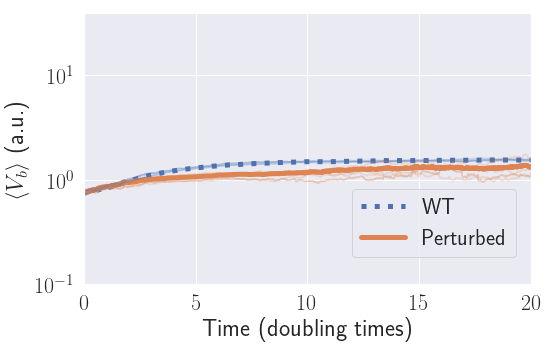

<Figure size 432x288 with 0 Axes>

In [264]:
fig=plt.figure(figsize=[8,5])
sns.set(font_scale=2.0)
current_palette = sns.color_palette()
temp1 = av_vec
tvec1 = np.linspace(0.0,temp1.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp1.shape[1])
temp2 = av_vec_right
tvec2 = np.linspace(0.0,temp2.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp2.shape[1])
plt.semilogy(tvec1,np.mean(temp1,axis=0),label='WT',lw=5.0,linestyle=':')
plt.semilogy(tvec2,np.mean(temp2[:,:],axis=0),label='Perturbed',lw=5.0,linestyle='-')
nums = np.random.randint(low=0,high=10,size=10)
for i0 in range(5):
    plt.semilogy(tvec1,temp1[nums[i0],:],alpha=0.2,color=current_palette[0])
    plt.semilogy(tvec2,temp2[nums[i0],:],alpha=0.2,color=current_palette[1])
plt.xlim(xmin=0,xmax=20)
plt.ylim(ymin=0.1,ymax=40)
plt.ylabel(r'$\langle V_b\rangle$ (a.u.)')
plt.xlabel('Time (doubling times)')
plt.legend(loc=[0.6,0.1])
# fig.savefig('./whi5_pert_expt_simulation/noisy_rate_model/av_volumes_tuned.png',bbox_inches='tight',dpi=300)
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/noisy_rate_model/av_volumes_tuned.png',bbox_inches='tight',dpi=300)
plt.show()
plt.clf()

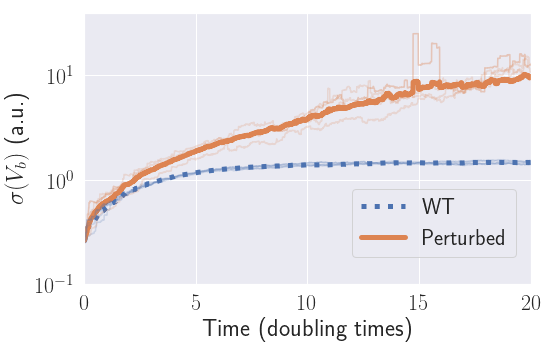

<Figure size 432x288 with 0 Axes>

In [265]:
fig=plt.figure(figsize=[8,5])
sns.set(font_scale=2.0)
current_palette = sns.color_palette()
temp1 = std_vec
tvec1 = np.linspace(0.0,temp1.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp1.shape[1])
temp2 = std_vec_right
tvec2 = np.linspace(0.0,temp2.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp2.shape[1])
plt.semilogy(tvec1,np.mean(temp1,axis=0),label='WT',lw=5.0,linestyle=':')
plt.semilogy(tvec2,np.mean(temp2[:,:],axis=0),label='Perturbed',lw=5.0)
nums = np.random.randint(low=0,high=10,size=10)
for i0 in range(5):
    plt.semilogy(tvec1,temp1[nums[i0],:],alpha=0.2,color=current_palette[0])
    plt.semilogy(tvec2,temp2[nums[i0],:],alpha=0.2,color=current_palette[1])
plt.xlim(xmin=0,xmax=20)
plt.ylim(ymin=0.1,ymax=40)
plt.ylabel('$\sigma(V_b)$ (a.u.)')
plt.xlabel('Time (doubling times)')
plt.legend(loc=[0.6,0.1])
# fig.savefig('./whi5_pert_expt_simulation/noisy_rate_model/std_volumes_tuned.png',bbox_inches='tight',dpi=300)
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/noisy_rate_model/std_volumes_tuned.png',bbox_inches='tight',dpi=300)
plt.show()
plt.clf()

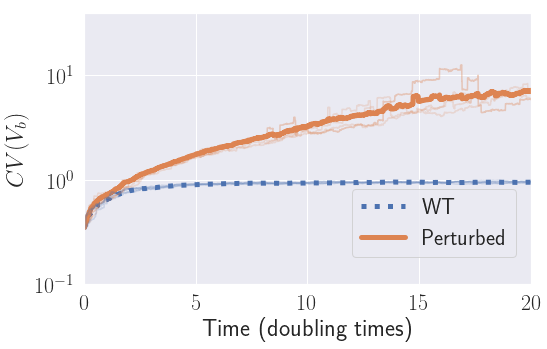

<Figure size 432x288 with 0 Axes>

In [266]:
fig=plt.figure(figsize=[8,5])
sns.set(font_scale=2.0)
current_palette = sns.color_palette()
temp1 = cv_vec
tvec1 = np.linspace(0.0,temp1.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp1.shape[1])
temp2 = cv_vec_right
tvec2 = np.linspace(0.0,temp2.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp2.shape[1])
plt.semilogy(tvec1,np.mean(temp1,axis=0),label='WT',lw=5.0,linestyle=':')
plt.semilogy(tvec2,np.mean(temp2[:,:],axis=0),label='Perturbed',lw=5.0)
nums = np.random.randint(low=0,high=10,size=10)
for i0 in range(5):
    plt.semilogy(tvec1,temp1[nums[i0],:],alpha=0.2,color=current_palette[0])
    plt.semilogy(tvec2,temp2[nums[i0],:],alpha=0.2,color=current_palette[1])
plt.xlim(xmin=0,xmax=20)
plt.ylim(ymin=0.1,ymax=40)
plt.ylabel('$CV(V_b)$')
plt.xlabel('Time (doubling times)')
plt.legend(loc=[0.6,0.1])
# fig.savefig('./whi5_pert_expt_simulation/noisy_rate_model/cv_volumes_tuned.png',bbox_inches='tight',dpi=300)
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/noisy_rate_model/cv_volumes_tuned.png',bbox_inches='tight',dpi=300)
plt.show()
plt.clf()

# Old code follows

In [151]:
gr=1.0
k=2.0
Wo=10.0
Vo=5.0
n=2
#

tvec=np.linspace(0.0,10.0,1001)
tdiv=[]

for ind in range(10000):
    temp_grow=0.00
    temp = np.random.uniform(low=0.0,high=1.0,size=1)[0]
    while temp>k*Vo**n*np.exp(n*gr*temp_grow)*0.01/Wo**n:
        temp = np.random.uniform(low=0.0,high=1.0,size=1)[0]
        temp_grow+=0.01
    tdiv.append(temp_grow)

In [4]:
def f_div(temp_t,temp_w,temp_gr,temp_v, temp_k,temp_n):
    return temp_k*temp_v**n/temp_w**n*np.exp(n*temp_gr*temp_t)*np.exp(-temp_k*temp_v**n*(np.exp(n*temp_gr*temp_t)-1)/(n*temp_gr*temp_w**n))

def inv_cdf(temp_F,temp_w,temp_gr,temp_v, temp_k,temp_n):
    return np.log(1-temp_n*temp_gr*temp_w**temp_n/(k*temp_v**temp_n)*np.log(temp_F))/(temp_n*temp_gr)

def exp_pdf(temp_t,temp_w,temp_gr,temp_v,temp_k,temp_n):
    return temp_k*np.exp(-temp_k*temp_t/(temp_w/temp_v)**2)/(temp_w/temp_v)**2

In [51]:
temp1=np.random.uniform(low=0.0,high=1.0,size=10000)
t_dist = inv_cdf(temp1,Wo,gr,Vo,k,n)

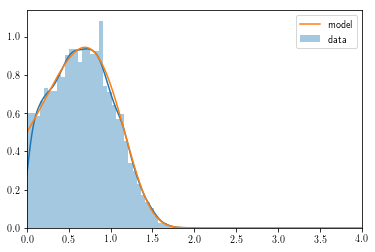

In [60]:
sns.distplot(tdiv,label='data')
plt.plot(tvec,f_div(tvec,Wo,gr,Vo,k,n),label='model')
# sns.distplot(t_dist,label='theory data')
plt.xlim(xmin=0.0,xmax=4.0)
plt.legend()

In [68]:
np.mod(10,4)

2

In [82]:
temp_grow

82.7000000000054

In [84]:
temp_w = kw*Vo/gr
k*Vo**n*0.01/temp_w**n

0.02

In [6]:
gr=1.0
k=2.0
Vo=5.0
n=2
#
kw=1.0
temp_w = kw*Vo/gr
tdiv=[]
for ind in range(1000):
    temp_grow = 0.0
    temp_w = kw*Vo/gr
    temp = np.random.uniform(low=0.0, high=1.0, size=1)[0]
    while temp>k*Vo**n*np.exp(n*gr*temp_grow)*0.01/temp_w**n:
#         print k*Vo**n*np.exp(n*gr*temp_grow)*0.01/temp_w**n
        temp = np.random.uniform(low=0.0,high=1.0,size=1)[0]
        temp_grow+=0.01
        temp_w+=kw*Vo*np.exp(gr*temp_grow)*0.01
    tdiv.append(temp_grow)
    if np.mod(ind,100)==0:
        print ind

0
100
200
300
400
500
600
700
800
900


In [163]:
np.mod(10,4)

2

Reached step n=0, population size
Reached step n=100, population size
Reached step n=200, population size
Reached step n=300, population size
Reached step n=400, population size
Reached step n=500, population size


KeyboardInterrupt: 

In [6]:
par_vals = {'nstep': 800, 'dt': 0.01, 'modeltype': 15, 'delta': 1.0, 'lambda': 1.0,'r':0.5,'lambda_std':0.0}
par_vals['n']=1
par_vals['k']=2.0
temp_vals = []
for ind1 in range(10):  # number of replicates
    init_pop = g.starting_popn(par_vals)
    c, obs,vol_vals = g.discr_time_1(par_vals, init_pop)
    temp1=[]
    temp1.append(obs)
    for ind in range(5):
        init_pop1 = g.starting_popn_seeded(c,par_vals)
        c, obs,vol_vals = g.discr_time_1(par_vals, init_pop1)
        temp1.append(obs)
        print 'Done Repeat {0}, iteration {1}'.format(ind1,ind)
    temp_vals.append(temp1)

KeyboardInterrupt: 

In [5]:
tvec = np.linspace(0.0,(par_vals['nstep']+1)*len(temp1)*par_vals['dt'] * np.log(2)/par_vals['lambda'],(par_vals['nstep']+1)*len(temp1))
# print tvec
std_vec = np.zeros([10,len(tvec)])
av_vec = np.zeros([10,len(tvec)])
cv_vec = np.zeros([10,len(tvec)])
for i1 in range(len(temp_vals)):
    for i0 in range(len(temp_vals[0])):
        std_vec[i1,i0*(par_vals['nstep']+1):(i0+1)*(par_vals['nstep']+1)]=temp_vals[i1][i0][6][:]
        av_vec[i1,i0*(par_vals['nstep']+1):(i0+1)*(par_vals['nstep']+1)]=temp_vals[i1][i0][5][:]
        cv_vec[i1,i0*(par_vals['nstep']+1):(i0+1)*(par_vals['nstep']+1)]=temp_vals[i1][i0][6][:]/temp1[i0][5][:]
np.save('./whi5_pert_expt_simulation/noisy_rate_model/model15_av_vb.npy',av_vec)
np.save('./whi5_pert_expt_simulation/noisy_rate_model/model15_std_vb.npy',std_vec)
np.save('./whi5_pert_expt_simulation/noisy_rate_model/model15_cv_vb.npy',cv_vec)

NameError: name 'par_vals' is not defined

In [52]:
std_log_vec_low=np.load('./whi5_pert_expt_simulation/noisy_rate_model/model16_std_log_vb_low_rate2.npy')
av_log_vec_low=np.load('./whi5_pert_expt_simulation/noisy_rate_model/model16_av_log_vb_low_rate2.npy')
cv_log_vec_low=np.load('./whi5_pert_expt_simulation/noisy_rate_model/model16_cv_log_vb_low_rate2.npy')


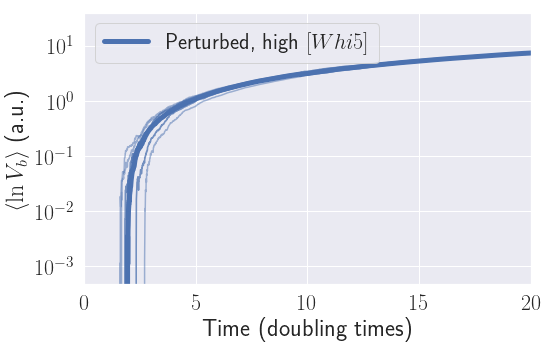

<Figure size 432x288 with 0 Axes>

In [91]:
fig=plt.figure(figsize=[8,5])
sns.set(font_scale=2.0)
current_palette = sns.color_palette()
temp2 = av_log_vec_low
tvec2 = np.linspace(0.0,temp2.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp2.shape[1])
plt.semilogy(tvec2,np.mean(temp2[:,:],axis=0),label='Perturbed, high $[Whi5]$',lw=5.0)
nums = np.random.randint(low=0,high=10,size=10)
for i0 in range(10):
    plt.semilogy(tvec2,temp2[nums[i0],:],alpha=0.5,color=current_palette[0])
#     plt.semilogy(tvec4,temp4[nums[i0],:],alpha=0.5,color=current_palette[3])
#     plt.semilogy(tvec2,temp2[i0,:],alpha=0.5)
# plt.fill_between(tvec2,np.mean(temp2,axis=0)-np.std(temp2,axis=0),np.mean(temp2,axis=0)+np.std(temp2,axis=0),alpha=0.5)
# plt.plot(tvec,std_vec,label='Std deviation in volume')
# plt.plot(tvec,std_vec,label='Std deviation in volume')
plt.xlim(xmin=0,xmax=20)
plt.ylabel(r'$\langle \ln V_{b} \rangle$ (a.u.)')
plt.xlabel('Time (doubling times)')
plt.legend()
# fig.savefig('./whi5_pert_expt_simulation/noisy_rate_model/av_volumes.png',bbox_inches='tight',dpi=300)
# fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/noisy_rate_model/av_volumes.png',bbox_inches='tight',dpi=300)
plt.show()
plt.clf()

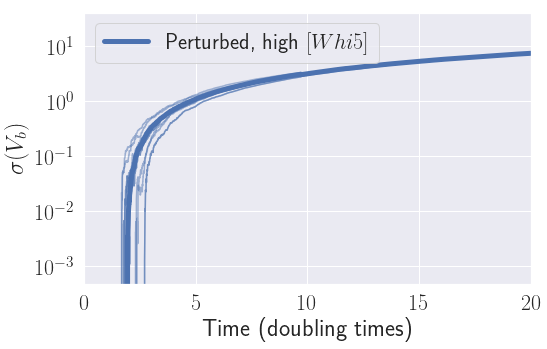

<Figure size 432x288 with 0 Axes>

In [92]:
fig=plt.figure(figsize=[8,5])
sns.set(font_scale=2.0)
current_palette = sns.color_palette()
temp2 = std_log_vec_low
tvec2 = np.linspace(0.0,temp2.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp2.shape[1])
plt.semilogy(tvec2,np.mean(temp2[:,:],axis=0),label='Perturbed, high $[Whi5]$',lw=5.0)
nums = np.random.randint(low=0,high=10,size=10)
for i0 in range(10):
    plt.semilogy(tvec2,temp2[nums[i0],:],alpha=0.5,color=current_palette[0])
#     plt.semilogy(tvec4,temp4[nums[i0],:],alpha=0.5,color=current_palette[3])
#     plt.semilogy(tvec2,temp2[i0,:],alpha=0.5)
# plt.fill_between(tvec2,np.mean(temp2,axis=0)-np.std(temp2,axis=0),np.mean(temp2,axis=0)+np.std(temp2,axis=0),alpha=0.5)
# plt.plot(tvec,std_vec,label='Std deviation in volume')
# plt.plot(tvec,std_vec,label='Std deviation in volume')
plt.xlim(xmin=0,xmax=20)
plt.ylabel(r'$\sigma(V_b)$')
plt.xlabel('Time (doubling times)')
plt.legend()
# fig.savefig('./whi5_pert_expt_simulation/noisy_rate_model/av_volumes.png',bbox_inches='tight',dpi=300)
# fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/noisy_rate_model/av_volumes.png',bbox_inches='tight',dpi=300)
plt.show()
plt.clf()

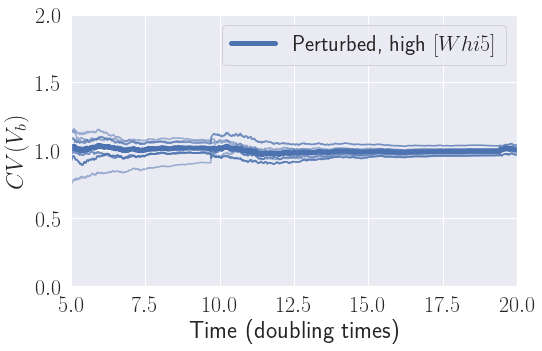

<Figure size 432x288 with 0 Axes>

In [99]:
fig=plt.figure(figsize=[8,5])
sns.set(font_scale=2.0)
current_palette = sns.color_palette()
temp2 = cv_log_vec_low
tvec2 = np.linspace(0.0,temp2.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp2.shape[1])
plt.plot(tvec2,np.mean(temp2[:,:],axis=0),label='Perturbed, high $[Whi5]$',lw=5.0)
nums = np.random.randint(low=0,high=10,size=10)
for i0 in range(10):
    plt.plot(tvec2,temp2[nums[i0],:],alpha=0.5,color=current_palette[0])
#     plt.semilogy(tvec4,temp4[nums[i0],:],alpha=0.5,color=current_palette[3])
#     plt.semilogy(tvec2,temp2[i0,:],alpha=0.5)
# plt.fill_between(tvec2,np.mean(temp2,axis=0)-np.std(temp2,axis=0),np.mean(temp2,axis=0)+np.std(temp2,axis=0),alpha=0.5)
# plt.plot(tvec,std_vec,label='Std deviation in volume')
# plt.plot(tvec,std_vec,label='Std deviation in volume')
plt.xlim(xmin=5,xmax=20)
plt.ylim(ymin=0.0,ymax=2)
plt.ylabel(r'$CV(V_b)$')
plt.xlabel('Time (doubling times)')
plt.legend()
# fig.savefig('./whi5_pert_expt_simulation/noisy_rate_model/av_volumes.png',bbox_inches='tight',dpi=300)
# fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/noisy_rate_model/av_volumes.png',bbox_inches='tight',dpi=300)
plt.show()
plt.clf()

In [90]:
std_vec=np.load('./whi5_pert_expt_simulation/noisy_rate_model/model15_std_vb1.npy')
av_vec=np.load('./whi5_pert_expt_simulation/noisy_rate_model/model15_av_vb1.npy')
cv_vec=np.load('./whi5_pert_expt_simulation/noisy_rate_model/model15_cv_vb1.npy')

std_vec_low=np.load('./whi5_pert_expt_simulation/noisy_rate_model/model16_std_vb_low_rate2.npy')
av_vec_low=np.load('./whi5_pert_expt_simulation/noisy_rate_model/model16_av_vb_low_rate2.npy')
cv_vec_low=np.load('./whi5_pert_expt_simulation/noisy_rate_model/model16_cv_vb_low_rate2.npy')

std_vec_high=np.load('./whi5_pert_expt_simulation/noisy_rate_model/model16_std_vb_high_rate.npy')
av_vec_high=np.load('./whi5_pert_expt_simulation/noisy_rate_model/model16_av_vb_high_rate.npy')
cv_vec_high=np.load('./whi5_pert_expt_simulation/noisy_rate_model/model16_cv_vb_high_rate.npy')

std_vec_right=np.load('./whi5_pert_expt_simulation/noisy_rate_model/model16_std_vb_right_rate1.npy')
av_vec_right=np.load('./whi5_pert_expt_simulation/noisy_rate_model/model16_av_vb_right_rate1.npy')
cv_vec_right=np.load('./whi5_pert_expt_simulation/noisy_rate_model/model16_cv_vb_right_rate1.npy')

In [24]:
print av_vec_high.shape

(10, 3006)


In [27]:
print av_vec_high[:,3000]

[2.86589549e-05 2.50829197e-05 1.64285387e-04 3.77256618e-05
 5.45567412e-05 3.02281788e-05 3.93435125e-05 3.33626088e-05
 5.35320224e-05 4.19235593e-05]


In [21]:
print std_vec_high

[[2.51944405e-01 2.54654812e-01 2.84991040e-01 ... 1.30044332e-04
  1.29646694e-04 1.29583089e-04]
 [2.66403275e-01 2.66403275e-01 2.66403275e-01 ... 1.08770221e-04
  1.08265278e-04 1.07777732e-04]
 [2.67153396e-01 2.67153396e-01 2.67153396e-01 ... 3.24435739e-03
  3.29173179e-03 3.27488750e-03]
 ...
 [2.59419607e-01 2.59419607e-01 2.61171132e-01 ... 1.77683664e-04
  1.76838854e-04 1.76049332e-04]
 [2.65096549e-01 2.67974197e-01 2.73465557e-01 ... 3.41505474e-04
  3.40419638e-04 3.39245121e-04]
 [2.52129958e-01 2.52129958e-01 2.52129958e-01 ... 1.93335111e-04
  1.92667386e-04 1.92070039e-04]]


In [19]:
print std_vec_high

[[2.62148112e-01 2.62148112e-01 2.62148112e-01 ... 1.09738104e-04
  1.09510976e-04 1.09079074e-04]
 [2.54690791e-01 2.54690791e-01 2.54690791e-01 ... 3.14766707e-04
  3.13138535e-04 3.11513591e-04]
 [2.67477060e-01 2.67477060e-01 2.67477060e-01 ... 6.09515869e-04
  6.08530390e-04 6.06084675e-04]
 ...
 [2.59566025e-01 2.59566025e-01 2.62013693e-01 ... 4.56370006e-04
  4.54356945e-04 4.52378246e-04]
 [2.67692834e-01 2.70766692e-01 2.70766692e-01 ... 1.32638549e-03
  1.33298685e-03 1.32611255e-03]
 [2.59806913e-01 2.59806913e-01 2.59806913e-01 ... 6.90483268e-04
  6.88035185e-04 6.85051507e-04]]


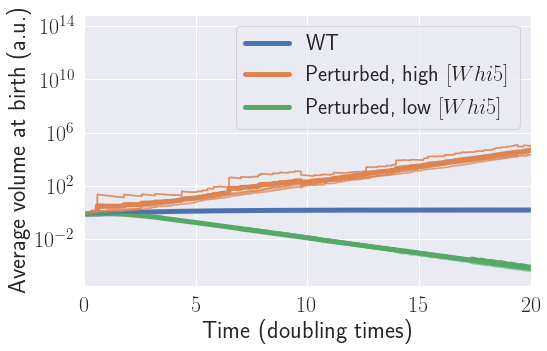

<Figure size 432x288 with 0 Axes>

In [85]:
fig=plt.figure(figsize=[8,5])
sns.set(font_scale=2.0)
current_palette = sns.color_palette()
temp1 = av_vec
tvec1 = np.linspace(0.0,temp1.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp1.shape[1])
temp2 = av_vec_low
tvec2 = np.linspace(0.0,temp2.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp2.shape[1])
plt.semilogy(tvec1,np.mean(temp1,axis=0),label='WT',lw=5.0)
plt.semilogy(tvec2,np.mean(temp2[:,:],axis=0),label='Perturbed, high $[Whi5]$',lw=5.0)
temp3 = av_vec_high
tvec3 = np.linspace(0.0,temp3.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp3.shape[1])
plt.semilogy(tvec3,np.mean(temp3,axis=0),label='Perturbed, low $[Whi5]$',lw=5.0)
# temp4 = av_vec_right
# tvec4 = np.linspace(0.0,temp4.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp4.shape[1])
# plt.semilogy(tvec4,np.mean(temp4,axis=0),label='Perturbed',lw=5.0)
nums = np.random.randint(low=0,high=10,size=10)
for i0 in range(10):
    plt.semilogy(tvec1,temp1[nums[i0],:],alpha=0.5,color=current_palette[0])
    plt.semilogy(tvec2,temp2[nums[i0],:],alpha=0.5,color=current_palette[1])
    plt.semilogy(tvec3,temp3[nums[i0],:],alpha=0.5,color=current_palette[2])
#     plt.semilogy(tvec4,temp4[nums[i0],:],alpha=0.5,color=current_palette[3])
#     plt.semilogy(tvec2,temp2[i0,:],alpha=0.5)
# plt.fill_between(tvec2,np.mean(temp2,axis=0)-np.std(temp2,axis=0),np.mean(temp2,axis=0)+np.std(temp2,axis=0),alpha=0.5)
# plt.plot(tvec,std_vec,label='Std deviation in volume')
# plt.plot(tvec,std_vec,label='Std deviation in volume')
plt.xlim(xmin=0,xmax=20)
plt.ylabel('Average volume at birth (a.u.)')
plt.xlabel('Time (doubling times)')
plt.legend()
fig.savefig('./whi5_pert_expt_simulation/noisy_rate_model/av_volumes.png',bbox_inches='tight',dpi=300)
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/noisy_rate_model/av_volumes.png',bbox_inches='tight',dpi=300)
plt.show()
plt.clf()

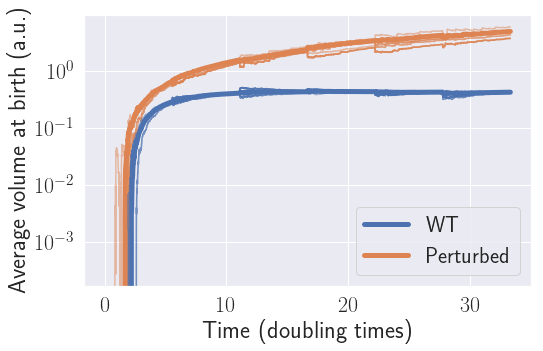

<Figure size 432x288 with 0 Axes>

In [86]:
fig=plt.figure(figsize=[8,5])
sns.set(font_scale=2.0)
temp1 = av_vec
tvec1 = np.linspace(0.0,temp1.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp1.shape[1])
plt.semilogy(tvec1,np.log(np.mean(temp1,axis=0)),label='WT',lw=5.0)
# temp2 = av_vec_low
# tvec2 = np.linspace(0.0,temp2.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp2.shape[1])

# plt.semilogy(tvec2,np.mean(temp2[:9,:],axis=0),label='Perturbed, high $[Whi5]$',lw=5.0)
# temp3 = av_vec_high
# tvec3 = np.linspace(0.0,temp3.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp3.shape[1])
# plt.semilogy(tvec3,np.mean(temp3,axis=0),label='Perturbed, low $[Whi5]$',lw=5.0)
temp4 = av_vec_right
tvec4 = np.linspace(0.0,temp4.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp4.shape[1])
plt.semilogy(tvec4,np.log(np.mean(temp4,axis=0)),label='Perturbed',lw=5.0)
nums = np.random.randint(low=0,high=10,size=10)
for i0 in range(10):
#     plt.semilogy(tvec1,temp1[nums[i0],:],alpha=0.5,color=current_palette[0])
#     plt.semilogy(tvec2,temp2[nums[i0],:],alpha=0.5,color=current_palette[1])
    plt.semilogy(tvec1,np.log(temp1[nums[i0],:]),alpha=0.5,color=current_palette[0])
    plt.semilogy(tvec4,np.log(temp4[nums[i0],:]),alpha=0.5,color=current_palette[1])
#     plt.semilogy(tvec2,temp2[i0,:],alpha=0.5)
# plt.fill_between(tvec2,np.mean(temp2,axis=0)-np.std(temp2,axis=0),np.mean(temp2,axis=0)+np.std(temp2,axis=0),alpha=0.5)
# plt.plot(tvec,std_vec,label='Std deviation in volume')
# plt.plot(tvec,std_vec,label='Std deviation in volume')
# plt.xlim(xmin=0,xmax=20)
plt.ylabel('Average volume at birth (a.u.)')
plt.xlabel('Time (doubling times)')
# plt.xlim(xmin-)
plt.legend()
fig.savefig('./whi5_pert_expt_simulation/noisy_rate_model/av_volumes.png',bbox_inches='tight',dpi=300)
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/noisy_rate_model/av_volumes_v1.png',bbox_inches='tight',dpi=300)
plt.show()
plt.clf()

In [83]:
np.around(np.linspace(500,800,19),0).astype(int)

array([500, 517, 533, 550, 567, 583, 600, 617, 633, 650, 667, 683, 700,
       717, 733, 750, 767, 783, 800])

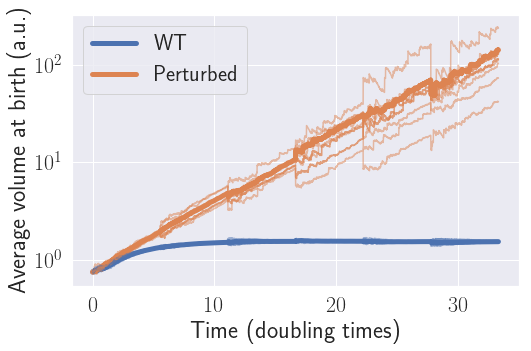

<Figure size 432x288 with 0 Axes>

In [67]:
fig=plt.figure(figsize=[8,5])
sns.set(font_scale=2.0)
temp1 = av_vec
tvec1 = np.linspace(0.0,temp1.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp1.shape[1])
plt.semilogy(tvec1,np.mean(temp1,axis=0),label='WT',lw=5.0)
# temp2 = av_vec_low
# tvec2 = np.linspace(0.0,temp2.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp2.shape[1])

# plt.semilogy(tvec2,np.mean(temp2[:9,:],axis=0),label='Perturbed, high $[Whi5]$',lw=5.0)
# temp3 = av_vec_high
# tvec3 = np.linspace(0.0,temp3.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp3.shape[1])
# plt.semilogy(tvec3,np.mean(temp3,axis=0),label='Perturbed, low $[Whi5]$',lw=5.0)
temp4 = av_vec_right
tvec4 = np.linspace(0.0,temp4.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp4.shape[1])
plt.semilogy(tvec4,np.mean(temp4,axis=0),label='Perturbed',lw=5.0)
nums = np.random.randint(low=0,high=10,size=10)
for i0 in range(10):
#     plt.semilogy(tvec1,temp1[nums[i0],:],alpha=0.5,color=current_palette[0])
#     plt.semilogy(tvec2,temp2[nums[i0],:],alpha=0.5,color=current_palette[1])
    plt.semilogy(tvec1,temp1[nums[i0],:],alpha=0.5,color=current_palette[0])
    plt.semilogy(tvec4,temp4[nums[i0],:],alpha=0.5,color=current_palette[1])
#     plt.semilogy(tvec2,temp2[i0,:],alpha=0.5)
# plt.fill_between(tvec2,np.mean(temp2,axis=0)-np.std(temp2,axis=0),np.mean(temp2,axis=0)+np.std(temp2,axis=0),alpha=0.5)
# plt.plot(tvec,std_vec,label='Std deviation in volume')
# plt.plot(tvec,std_vec,label='Std deviation in volume')
# plt.xlim(xmin=0,xmax=20)
plt.ylabel('Average volume at birth (a.u.)')
plt.xlabel('Time (doubling times)')
plt.legend()
fig.savefig('./whi5_pert_expt_simulation/noisy_rate_model/av_volumes.png',bbox_inches='tight',dpi=300)
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/noisy_rate_model/av_volumes_v1.png',bbox_inches='tight',dpi=300)
plt.show()
plt.clf()

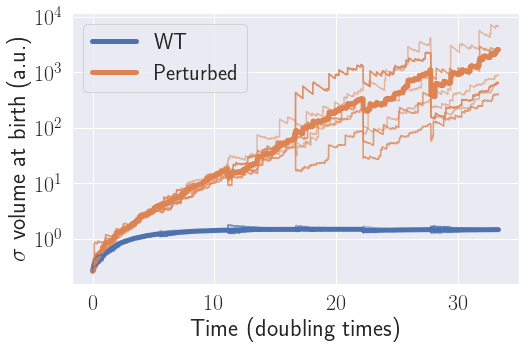

<Figure size 432x288 with 0 Axes>

In [87]:
fig=plt.figure(figsize=[8,5])
sns.set(font_scale=2.0)
temp1 = std_vec
tvec1 = np.linspace(0.0,temp1.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp1.shape[1])
plt.semilogy(tvec1,np.mean(temp1,axis=0),label='WT',lw=5.0)
temp4 = std_vec_right
tvec4 = np.linspace(0.0,temp4.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp4.shape[1])
plt.semilogy(tvec4,np.mean(temp4,axis=0),label='Perturbed',lw=5.0)
nums = np.random.randint(low=0,high=10,size=10)
for i0 in range(10):
    plt.semilogy(tvec1,temp1[nums[i0],:],alpha=0.5,color=current_palette[0])
    plt.semilogy(tvec4,temp4[nums[i0],:],alpha=0.5,color=current_palette[1])
plt.ylabel('$\sigma$ volume at birth (a.u.)')
plt.xlabel('Time (doubling times)')
plt.legend()
fig.savefig('./whi5_pert_expt_simulation/noisy_rate_model/av_volumes.png',bbox_inches='tight',dpi=300)
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/noisy_rate_model/std_volumes_v1.png',bbox_inches='tight',dpi=300)
plt.show()
plt.clf()

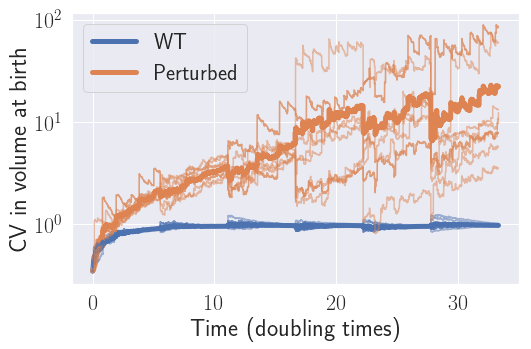

<Figure size 432x288 with 0 Axes>

In [49]:
fig=plt.figure(figsize=[8,5])
sns.set(font_scale=2.0)
temp1 = cv_vec
tvec1 = np.linspace(0.0,temp1.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp1.shape[1])
plt.semilogy(tvec1,np.mean(temp1,axis=0),label='WT',lw=5.0)
temp4 = cv_vec_right
tvec4 = np.linspace(0.0,temp4.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp4.shape[1])
plt.semilogy(tvec4,np.mean(temp4,axis=0),label='Perturbed',lw=5.0)
nums = np.random.randint(low=0,high=10,size=10)
for i0 in range(10):
    plt.semilogy(tvec1,temp1[nums[i0],:],alpha=0.5,color=current_palette[0])
    plt.semilogy(tvec4,temp4[nums[i0],:],alpha=0.5,color=current_palette[1])
plt.ylabel('CV in volume at birth')
plt.xlabel('Time (doubling times)')
plt.legend()
fig.savefig('./whi5_pert_expt_simulation/noisy_rate_model/av_volumes.png',bbox_inches='tight',dpi=300)
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/noisy_rate_model/cv_volumes_v1.png',bbox_inches='tight',dpi=300)
plt.show()
plt.clf()

In [115]:
current_palette = sns.color_palette()

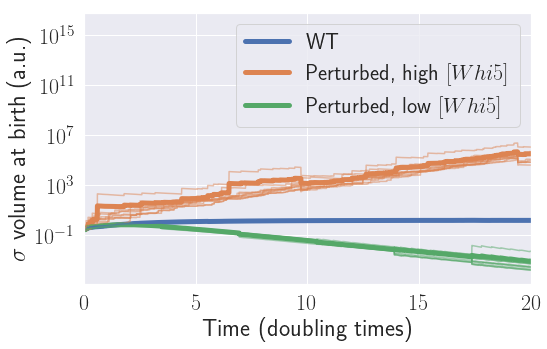

<Figure size 432x288 with 0 Axes>

In [88]:
fig=plt.figure(figsize=[8,5])
sns.set(font_scale=2.0)
temp1 = std_vec
tvec1 = np.linspace(0.0,temp1.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp1.shape[1])
temp2 = std_vec_low
tvec2 = np.linspace(0.0,temp2.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp2.shape[1])
plt.semilogy(tvec1,np.mean(temp1,axis=0),label='WT',lw=5.0)
plt.semilogy(tvec2,np.mean(temp2[:,:],axis=0),label='Perturbed, high $[Whi5]$',lw=5.0)
temp3 = std_vec_high
tvec3 = np.linspace(0.0,temp3.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp3.shape[1])
plt.semilogy(tvec3,np.mean(temp3,axis=0),label='Perturbed, low $[Whi5]$',lw=5.0)
# temp4 = std_vec_right
# tvec4 = np.linspace(0.0,temp4.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp4.shape[1])
# plt.semilogy(tvec4,np.mean(temp4,axis=0),label='Perturbed',lw=5.0)
nums = np.random.randint(low=0,high=10,size=10)

for i0 in range(10):
    plt.semilogy(tvec1,temp1[nums[i0],:],alpha=0.5,color=current_palette[0])
    plt.semilogy(tvec2,temp2[nums[i0],:],alpha=0.5,color=current_palette[1])
    plt.semilogy(tvec3,temp3[nums[i0],:],alpha=0.5,color=current_palette[2])
#     plt.semilogy(tvec4,temp4[nums[i0],:],alpha=0.5,color=current_palette[3])
#     plt.semilogy(tvec2,temp2[i0,:],alpha=0.5)
# plt.fill_between(tvec2,np.mean(temp2,axis=0)-np.std(temp2,axis=0),np.mean(temp2,axis=0)+np.std(temp2,axis=0),alpha=0.5)
# plt.plot(tvec,std_vec,label='Std deviation in volume')
# plt.plot(tvec,std_vec,label='Std deviation in volume')
plt.xlim(xmin=0,xmax=20)
plt.ylabel(r'$\sigma$ volume at birth (a.u.)')
plt.xlabel('Time (doubling times)')
plt.legend()
fig.savefig('./whi5_pert_expt_simulation/noisy_rate_model/std_volumes.png',bbox_inches='tight',dpi=300)
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/noisy_rate_model/std_volumes.png',bbox_inches='tight',dpi=300)
plt.show()
plt.clf()

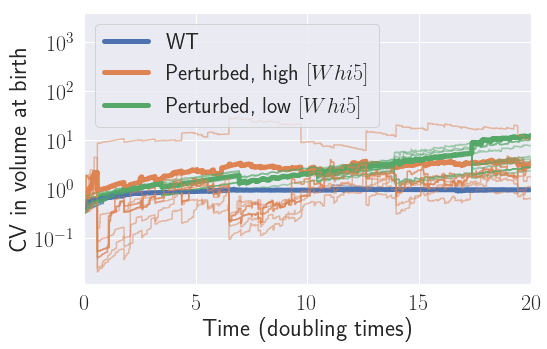

<Figure size 432x288 with 0 Axes>

In [89]:
fig=plt.figure(figsize=[8,5])
sns.set(font_scale=2.0)
temp1 = cv_vec
tvec1 = np.linspace(0.0,temp1.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp1.shape[1])
temp2 = cv_vec_low
tvec2 = np.linspace(0.0,temp2.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp2.shape[1])
plt.semilogy(tvec1,np.mean(temp1,axis=0),label='WT',lw=5.0)
plt.semilogy(tvec2,np.mean(temp2[:,:],axis=0),label='Perturbed, high $[Whi5]$',lw=5.0)
temp3 = cv_vec_high
tvec3 = np.linspace(0.0,temp3.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp3.shape[1])
plt.semilogy(tvec3,np.mean(temp3,axis=0),label='Perturbed, low $[Whi5]$',lw=5.0)
# temp4 = cv_vec_right
# tvec4 = np.linspace(0.0,temp4.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp4.shape[1])
# plt.semilogy(tvec4,np.mean(temp4,axis=0),label='Perturbed',lw=5.0)
nums = np.random.randint(low=0,high=10,size=10)
for i0 in range(10):
    plt.semilogy(tvec1,temp1[nums[i0],:],alpha=0.5,color=current_palette[0])
    plt.semilogy(tvec2,temp2[nums[i0],:],alpha=0.5,color=current_palette[1])
    plt.semilogy(tvec3,temp3[nums[i0],:],alpha=0.5,color=current_palette[2])
#     plt.semilogy(tvec4,temp4[nums[i0],:],alpha=0.5,color=current_palette[3])
#     plt.semilogy(tvec2,temp2[i0,:],alpha=0.5)
# plt.fill_between(tvec2,np.mean(temp2,axis=0)-np.std(temp2,axis=0),np.mean(temp2,axis=0)+np.std(temp2,axis=0),alpha=0.5)
# plt.plot(tvec,std_vec,label='Std deviation in volume')
# plt.plot(tvec,std_vec,label='Std deviation in volume')
plt.xlim(xmin=0,xmax=20)
plt.ylabel(r'CV in volume at birth')
plt.xlabel('Time (doubling times)')
plt.legend()
fig.savefig('./whi5_pert_expt_simulation/noisy_rate_model/cv_volumes.png',bbox_inches='tight',dpi=300)
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/noisy_rate_model/cv_volumes.png',bbox_inches='tight',dpi=300)
plt.show()
plt.clf()

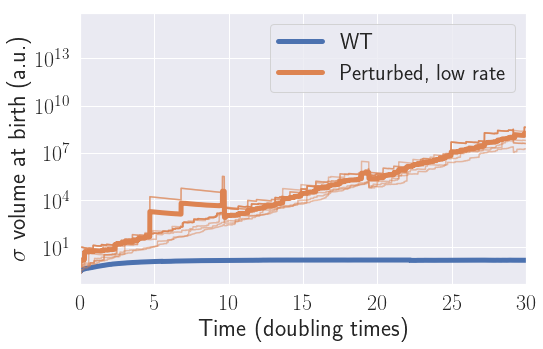

<Figure size 432x288 with 0 Axes>

In [46]:

fig=plt.figure(figsize=[8,5])
sns.set(font_scale=2.0)
temp1 = std_vec
tvec1 = np.linspace(0.0,temp1.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp1.shape[1])
temp2 = std_vec_low
tvec2 = np.linspace(0.0,temp2.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp2.shape[1])
plt.semilogy(tvec1,np.mean(temp1,axis=0),label='WT',lw=5.0)
# plt.fill_between(tvec1,np.mean(temp1,axis=0)-np.std(temp1,axis=0),np.mean(temp1,axis=0)+np.std(temp1,axis=0),alpha=0.5)
plt.semilogy(tvec2,np.mean(temp2[:9,:],axis=0),label='Perturbed, low rate',lw=5.0)
nums = np.random.randint(low=0,high=10,size=10)
for i0 in range(10):
    plt.semilogy(tvec1,temp1[nums[i0],:],alpha=0.5,color=current_palette[0])
    plt.semilogy(tvec2,temp2[nums[i0],:],alpha=0.5,color=current_palette[1])
#     plt.semilogy(tvec2,temp2[i0,:],alpha=0.5)
# plt.fill_between(tvec2,np.mean(temp2,axis=0)-np.std(temp2,axis=0),np.mean(temp2,axis=0)+np.std(temp2,axis=0),alpha=0.5)
# plt.plot(tvec,std_vec,label='Std deviation in volume')
# plt.plot(tvec,std_vec,label='Std deviation in volume')
plt.xlim(xmin=0,xmax=30)
plt.ylabel(r'$\sigma$ volume at birth (a.u.)')
plt.xlabel('Time (doubling times)')
plt.legend()
fig.savefig('./whi5_pert_expt_simulation/noisy_rate_model/std_volumes.png',bbox_inches='tight',dpi=300)
plt.show()
plt.clf()

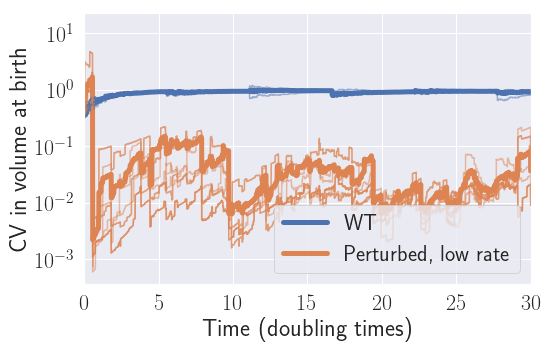

<Figure size 432x288 with 0 Axes>

In [119]:
fig=plt.figure(figsize=[8,5])
sns.set(font_scale=2.0)
temp1 = cv_vec
tvec1 = np.linspace(0.0,temp1.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp1.shape[1])
temp2 = cv_vec_low
tvec2 = np.linspace(0.0,temp2.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp2.shape[1])
plt.semilogy(tvec1,np.mean(temp1,axis=0),label='WT',lw=5.0)
# plt.fill_between(tvec1,np.mean(temp1,axis=0)-np.std(temp1,axis=0),np.mean(temp1,axis=0)+np.std(temp1,axis=0),alpha=0.5)
plt.semilogy(tvec2,np.mean(temp2[:9,:],axis=0),label='Perturbed, low rate',lw=5.0)
nums = np.random.randint(low=0,high=10,size=10)
for i0 in range(10):
    plt.semilogy(tvec1,temp1[nums[i0],:],alpha=0.5,color=current_palette[0])
    plt.semilogy(tvec2,temp2[nums[i0],:],alpha=0.5,color=current_palette[1])
#     plt.semilogy(tvec2,temp2[i0,:],alpha=0.5)
# plt.fill_between(tvec2,np.mean(temp2,axis=0)-np.std(temp2,axis=0),np.mean(temp2,axis=0)+np.std(temp2,axis=0),alpha=0.5)
# plt.plot(tvec,std_vec,label='Std deviation in volume')
# plt.plot(tvec,std_vec,label='Std deviation in volume')
plt.xlim(xmin=0,xmax=30)
plt.ylabel(r'CV in volume at birth')
plt.xlabel('Time (doubling times)')
plt.legend()
fig.savefig('./whi5_pert_expt_simulation/noisy_rate_model/cv_volumes.png',bbox_inches='tight',dpi=300)
plt.show()
plt.clf()

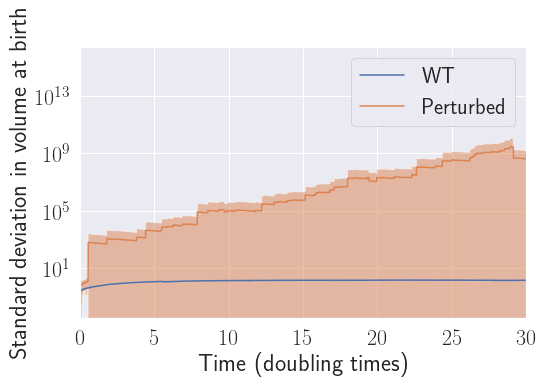

In [68]:
fig=plt.figure(figsize=[8,5])
sns.set(font_scale=2.0)
temp1 = std_vec
tvec1 = np.linspace(0.0,temp1.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp1.shape[1])
temp2 = std_vec_low
tvec2 = np.linspace(0.0,temp2.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp2.shape[1])
plt.semilogy(tvec1,np.mean(temp1,axis=0),label='WT')
plt.fill_between(tvec1,np.mean(temp1,axis=0)-np.std(temp1,axis=0),np.mean(temp1,axis=0)+np.std(temp1,axis=0),alpha=0.5)
plt.semilogy(tvec2,np.mean(temp2,axis=0),label='Perturbed')
plt.fill_between(tvec2,np.mean(temp2,axis=0)-np.std(temp2,axis=0),np.mean(temp2,axis=0)+np.std(temp2,axis=0),alpha=0.5)
# plt.plot(tvec,std_vec,label='Std deviation in volume')
# plt.plot(tvec,std_vec,label='Std deviation in volume')
plt.xlim(xmin=0,xmax=30)
plt.ylabel('Standard deviation in volume at birth')
plt.xlabel('Time (doubling times)')
plt.legend()

In [70]:
temp1.shape

(10, 4806)

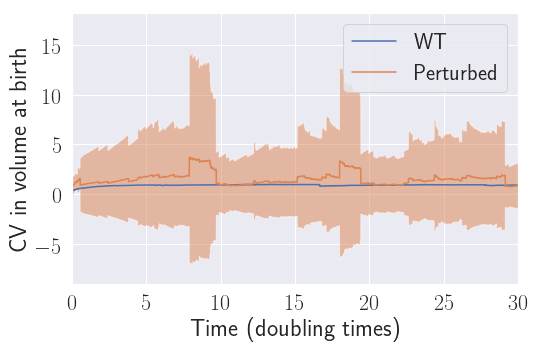

In [69]:
fig=plt.figure(figsize=[8,5])
sns.set(font_scale=2.0)
temp1 = cv_vec
tvec1 = np.linspace(0.0,temp1.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp1.shape[1])
temp2 = cv_vec_low
tvec2 = np.linspace(0.0,temp2.shape[1]*par_vals['dt'] * np.log(2)/par_vals['lambda'],temp2.shape[1])
plt.plot(tvec1,np.mean(temp1,axis=0),label='WT')
plt.fill_between(tvec1,np.mean(temp1,axis=0)-np.std(temp1,axis=0),np.mean(temp1,axis=0)+np.std(temp1,axis=0),alpha=0.5)
plt.plot(tvec2,np.mean(temp2,axis=0),label='Perturbed')
plt.fill_between(tvec2,np.mean(temp2,axis=0)-np.std(temp2,axis=0),np.mean(temp2,axis=0)+np.std(temp2,axis=0),alpha=0.5)
# plt.plot(tvec,std_vec,label='Std deviation in volume')
# plt.plot(tvec,std_vec,label='Std deviation in volume')
plt.xlim(xmin=0,xmax=30)
plt.ylabel('CV in volume at birth')
plt.xlabel('Time (doubling times)')
plt.legend()

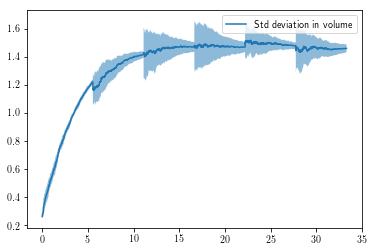

In [55]:
plt.plot(tvec,np.mean(std_vec,axis=0),label='Std deviation in volume')
plt.fill_between(tvec,np.mean(std_vec,axis=0)-np.std(std_vec,axis=0),np.mean(std_vec,axis=0)+np.std(std_vec,axis=0),alpha=0.5)
# plt.plot(tvec,std_vec,label='Std deviation in volume')
# plt.plot(tvec,std_vec,label='Std deviation in volume')
plt.legend()

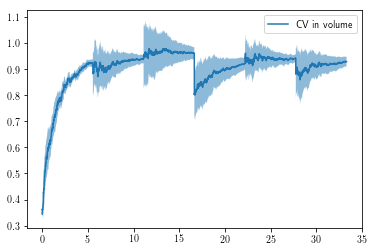

In [56]:
plt.plot(tvec,np.mean(cv_vec,axis=0),label='CV in volume')
plt.fill_between(tvec,np.mean(cv_vec,axis=0)-np.std(cv_vec,axis=0),np.mean(cv_vec,axis=0)+np.std(cv_vec,axis=0),alpha=0.5)
# plt.plot(tvec,std_vec,label='Std deviation in volume')
# plt.plot(tvec,std_vec,label='Std deviation in volume')
plt.legend()

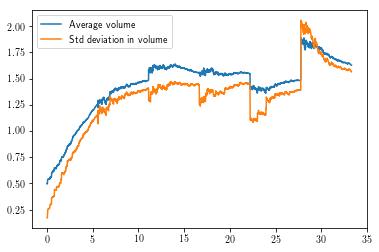

In [37]:
plt.plot(tvec,av_vec,label='Average volume')
plt.plot(tvec,std_vec,label='Std deviation in volume')
# plt.plot(tvec,std_vec,label='Std deviation in volume')
plt.legend()

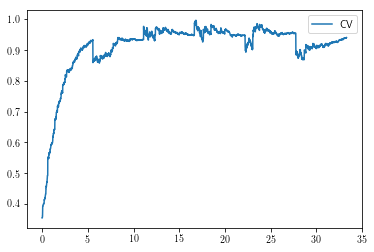

In [43]:
plt.plot(tvec,cv_vec,label='CV')
# plt.plot(tvec,std_vec,label='Std deviation in volume')
plt.legend()

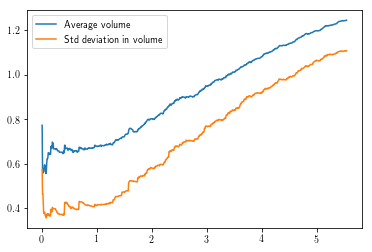

In [34]:
plt.plot(obs[1],obs[5],label='Average volume')
plt.plot(obs[1],obs[6],label='Std deviation in volume')
plt.legend()

In [44]:
par_vals = {'nstep': 800, 'dt': 0.01, 'modeltype': 16, 'delta': 1.0, 'lambda': 1.0,'r':0.5,'lambda_std':0.0}
par_vals['n']=1
par_vals['k']=2.0
par_vals['kw']=1.0
init_pop = g.starting_popn(par_vals)
c, obs,vol_vals = g.discr_time_1(par_vals, init_pop)
temp2=[]
temp2.append(obs)
for ind in range(5):
    init_pop1 = g.starting_popn_seeded(c,par_vals)
    c, obs,vol_vals = g.discr_time_1(par_vals, init_pop1)
    temp2.append(obs)
    print ind

0
1
2
3
4


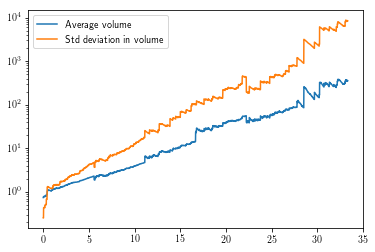

In [47]:
plt.semilogy(tvec,av_vec,label='Average volume')
plt.semilogy(tvec,std_vec,label='Std deviation in volume')
# plt.plot(tvec,std_vec,label='Std deviation in volume')
plt.legend()

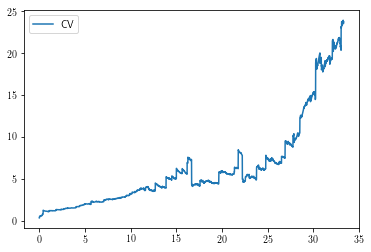

In [48]:
plt.plot(tvec,cv_vec,label='CV')
# plt.plot(tvec,std_vec,label='Std deviation in volume')
plt.legend()

In [45]:
tvec = np.linspace(0.0,(par_vals['nstep']+1)*len(temp2)*par_vals['dt'] * np.log(2)/par_vals['lambda'],(par_vals['nstep']+1)*len(temp2))
print tvec
std_vec = np.zeros(len(tvec))
av_vec = np.zeros(len(tvec))
cv_vec = np.zeros(len(tvec))
print len(std_vec)
for i0 in range(len(temp2)):
    std_vec[i0*(par_vals['nstep']+1):(i0+1)*(par_vals['nstep']+1)]=temp2[i0][6][:]
    av_vec[i0*(par_vals['nstep']+1):(i0+1)*(par_vals['nstep']+1)]=temp2[i0][5][:]
    cv_vec[i0*(par_vals['nstep']+1):(i0+1)*(par_vals['nstep']+1)]=temp2[i0][6][:]/temp2[i0][5][:]
                   

[0.00000000e+00 6.93291436e-03 1.38658287e-02 ... 3.32987877e+01
 3.33057206e+01 3.33126535e+01]
4806


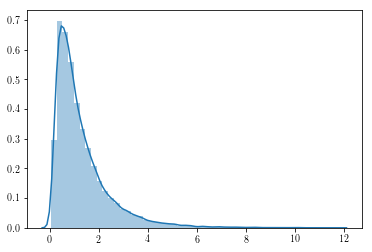

In [20]:
sns.distplot([obj.vb for obj in c])

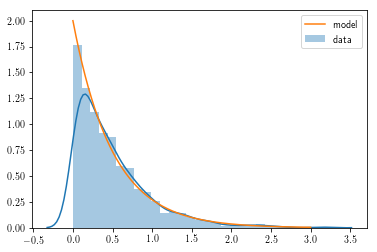

In [10]:
sns.distplot(tdiv,label='data')
tvec=np.linspace(0.0,3.0,1001)
plt.plot(tvec,exp_pdf(tvec,kw*Vo/gr,gr,Vo,k,n),label='model')
# sns.distplot(t_dist,label='theory data')
# plt.xlim(xmin=0.0,xmax=4.0)
plt.legend()

In [ ]:
gr=1.0
k=2.0
Wo=10.0
Vo=5.0
n=2
#

tvec=np.linspace(0.0,10.0,1001)
tdiv=[]
for ind in range(10000):
    ind1=0
    temp = np.random.uniform(low=0.0,high=1.0,size=1)[0]
    while temp>k*Vo**n*np.exp(n*gr*tvec[ind1])*0.01/Wo**n:
        temp = np.random.uniform(low=0.0,high=1.0,size=1)[0]
        ind1+=1
    tdiv.append(tvec[ind1])

In [4]:
def growth(temp_lambda,temp_beta,temp_sigma,temp_epsilon):
    x=0.5-temp_beta
#     print x**2
    return temp_lambda*(1-16*x**4*temp_epsilon+(-0.653426+1.88539*x**2+x**4*(3.81162 -10.4548*temp_epsilon)+x**6*(10.2238 +30.1662*temp_epsilon))*temp_sigma**2)
# def growth_v1(temp_lambda,temp_beta,temp_sigma,temp_epsilon):
#     x=1.0-2*temp_beta
#     temp_lambda1 = temp_lambda*(1-temp_epsilon*x**4)
#     return temp_lambda*(1+(-0.653426+1.8854*(temp_b-0.5)**2+3.812*(temp_b-0.5)**4+10.2238*(temp_b-0.5)**6)*(temp_lstd)**2)
#     return temp_lambda*(1-4*x**4*temp_epsilon+(-0.653426+1.88539*x**2+x**4*(3.81162 -2.61371*temp_epsilon)+x**6*(10.2238 +7.54156*temp_epsilon))*temp_sigma**2)

In [12]:
x=np.zeros([1,10])
print x.shape

(1, 10)


In [15]:
np.reshape(x,x.shape[1])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [6]:
l = np.array([1.0])
td_std = np.array([0.01])  # 1
lambda_std = np.linspace(0.001,0.2,num=6)  # 16
delta = np.array([1.0])
beta = np.linspace(0.5, 0.1, num=5)  # 19
r = beta/(1-beta)
alpha = np.array([0.0])  # 3
epsilon = np.array([0.0,0.04])  #4
par_vals = {'nstep': 800, 'dt': 0.01, 'v_init': 1.0, 'modeltype': 14, 'delta': delta[0], 'lambda': l[0], 'exp_n':4, 'T2':0.0}
par_vals['td_std'] = td_std[0]
par_vals['lambda_std']=lambda_std[3]
par_vals['f']=alpha[0]
par_vals['epsilon']=epsilon[1]
num_rep=4
out_vals=np.zeros([len(beta),num_rep])
for i0 in range(len(beta)):
    for i1 in range(num_rep):
        tic=time.clock()
        par_vals['r']=r[i0]
    #     print par_vals
        init_pop = g.starting_popn(par_vals)
        c, obs,vol_vals = g.discr_time_1(par_vals, init_pop)
        temp = scipy.stats.linregress(obs[1][400:], np.log(obs[13][400:]))
        out_vals[i0,i1] = temp[0]  # GR vol
#         fig=plt.figure(figsize=[5,5])
#         plt.plot(obs[1][400:], np.log(obs[13][400:]),label='data')
#         plt.plot(obs[1][400:],temp[0]*obs[1][400:]+temp[1],label='fit')
#         plt.legend()
#         plt.show()
#         plt.clf()
        print 'done beta={0}, repeat {1}'.format(beta[i0],i1), 'time taken = {0}'.format(np.around(time.clock()-tic,2))
        print temp[0], growth(1.0,beta[i0],lambda_std[3],epsilon[1])

done beta=0.5, repeat 0 time taken = 29.48
0.9907100507508437 0.99052783215584
done beta=0.5, repeat 1 time taken = 31.09
0.9880600947010901 0.99052783215584
done beta=0.5, repeat 2 time taken = 32.69
0.9927402444102291 0.99052783215584
done beta=0.5, repeat 3 time taken = 37.53
0.9902532307988654 0.99052783215584
done beta=0.4, repeat 0 time taken = 41.96
0.9891493759618051 0.9907422261719908
done beta=0.4, repeat 1 time taken = 37.72
0.9907702687004969 0.9907422261719908
done beta=0.4, repeat 2 time taken = 38.77
0.9907443220068994 0.9907422261719908
done beta=0.4, repeat 3 time taken = 38.19
0.9920413987099937 0.9907422261719908
done beta=0.3, repeat 0 time taken = 40.35
0.9763223086481683 0.9906863800869115
done beta=0.3, repeat 1 time taken = 37.04
0.9792713034128625 0.9906863800869115
done beta=0.3, repeat 2 time taken = 36.5
0.9816900454519736 0.9906863800869115
done beta=0.3, repeat 3 time taken = 40.34
0.9793194099847935 0.9906863800869115
done beta=0.2, repeat 0 time taken = 

In [34]:
out_vals+=out_vals1

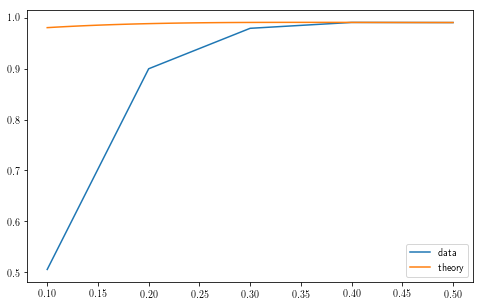

<Figure size 432x288 with 0 Axes>

In [10]:
fig=plt.figure(figsize=[8,5])
beta1=np.linspace(0.1,0.5,50)
plt.plot(beta,np.mean(out_vals,axis=1),label='data')
plt.plot(beta1,growth(1.0,beta1,lambda_std[3],epsilon[1]),label='theory')
plt.legend()
plt.show()
plt.clf()

In [37]:
l = np.array([1.0])
td_std = np.array([0.01])  # 1
lambda_std = np.linspace(0.001,0.2,num=6)  # 16
delta = np.array([1.0])
beta = np.linspace(0.5, 0.1, num=5)  # 19
r = beta/(1-beta)
alpha = np.array([0.0])  # 3
epsilon = np.array([0.0,0.04])  #4
par_vals = {'nstep': 800, 'dt': 0.01, 'v_init': 1.0, 'modeltype': 14, 'delta': delta[0], 'lambda': l[0], 'exp_n':4, 'T2':0.0}
par_vals['td_std'] = td_std[0]
par_vals['lambda_std']=lambda_std[3]
par_vals['f']=alpha[0]
par_vals['epsilon']=epsilon[1]
num_rep=4
out_vals2=np.zeros([len(beta),num_rep])
for i0 in range(3,len(beta)):
    for i1 in range(num_rep):
        tic=time.clock()
        par_vals['r']=r[i0]
    #     print par_vals
        init_pop = g.starting_popn(par_vals)
        c, obs,vol_vals = g.discr_time_1(par_vals, init_pop)
        temp = scipy.stats.linregress(obs[1][400:], np.log(obs[13][400:]))
        out_vals2[i0,i1] = temp[0]  # GR vol
#         fig=plt.figure(figsize=[5,5])
#         plt.plot(obs[1][400:], np.log(obs[13][400:]),label='data')
#         plt.plot(obs[1][400:],temp[0]*obs[1][400:]+temp[1],label='fit')
#         plt.legend()
#         plt.show()
#         plt.clf()
        print 'done beta={0}, repeat {1}'.format(beta[i0],i1), 'time taken = {0}'.format(np.around(time.clock()-tic,2))
        print temp[0], growth(1.0,beta[i0],lambda_std[3],epsilon[1])

done beta=0.2, repeat 0 time taken = 52.96
0.9762440646865385 0.9883228606371166
done beta=0.2, repeat 1 time taken = 60.97
0.9798953465999382 0.9883228606371166
done beta=0.2, repeat 2 time taken = 61.35
0.9858049487524949 0.9883228606371166
done beta=0.2, repeat 3 time taken = 58.72
0.9759728407693893 0.9883228606371166
done beta=0.1, repeat 0 time taken = 86.05
0.9722861243397399 0.9804547828404923
done beta=0.1, repeat 1 time taken = 84.71
0.9742892987368634 0.9804547828404923
done beta=0.1, repeat 2 time taken = 86.62
0.9731756528484752 0.9804547828404923
done beta=0.1, repeat 3 time taken = 80.79
0.9701720538191491 0.9804547828404923


In [ ]:
fig=plt.figure(figsize=[8,5])
beta1=np.linspace(0.1,0.5,50)
plt.plot(beta,np.mean(out_vals2,axis=1),label='data')
plt.plot(beta1,growth(1.0,beta1,lambda_std[3],epsilon[0]),label='theory')
plt.legend()
plt.show()
plt.clf()

In [18]:
l = np.array([1.0])
td_std = np.array([0.01])  # 1
lambda_std = np.linspace(0.001,0.2,num=6)  # 16
delta = np.array([1.0])
beta = np.linspace(0.1, 0.5, num=5)  # 19
r = beta/(1-beta)
alpha = np.array([0.0])  # 3
epsilon = np.array([0.0,0.04])  #4
par_vals = {'nstep': 800, 'dt': 0.01, 'v_init': 1.0, 'modeltype': 8, 'delta': delta[0], 'lambda': l[0], 'exp_n':4, 'T2':0.0}
par_vals['td_std'] = td_std[0]
par_vals['lambda_std']=lambda_std[3]
par_vals['f']=alpha[0]
par_vals['epsilon']=epsilon[1]
num_rep=4
out_vals1=np.zeros([len(beta),num_rep])
for i0 in range(len(beta)):
    for i1 in range(num_rep):
        tic=time.clock()
        par_vals['r']=r[i0]
    #     print par_vals
        init_pop = g.starting_popn(par_vals)
        c, obs,vol_vals = g.discr_time_1(par_vals, init_pop)
        temp = scipy.stats.linregress(obs[1][400:], np.log(obs[13][400:]))
        out_vals1[i0,i1] = temp[0]  # GR vol
#         fig=plt.figure(figsize=[5,5])
#         plt.plot(obs[1][400:], np.log(obs[13][400:]),label='data')
#         plt.plot(obs[1][400:],temp[0]*obs[1][400:]+temp[1],label='fit')
#         plt.legend()
#         plt.show()
#         plt.clf()
        print 'done beta={0}, repeat {1}'.format(beta[i0],i1), 'time taken = {0}'.format(np.around(time.clock()-tic,2))
        print temp[0], growth(1.0,beta[i0],lambda_std[3],epsilon[0])

done beta=0.1, repeat 0 time taken = 86.14
0.9930463973902932 0.9969223283418619
done beta=0.1, repeat 1 time taken = 81.27
0.9976781154067813 0.9969223283418619
done beta=0.1, repeat 2 time taken = 84.11
0.9913661887675741 0.9969223283418619


KeyboardInterrupt: 

In [7]:
l = np.array([1.0])
td_std = np.linspace(0.0, 0.2, num=5)
l_std = np.linspace(0.001, 0.2, num=11)
delta = np.array([1.0])
beta = np.linspace(0.05,0.5, num=20)
alpha = np.linspace(0.0, 1.0, num=11)
tic=time.clock()
num_rep = 4
par1 = {'nstep': 1000, 'dt':0.01, 'v_init':1.0, 'modeltype':13, 'delta':delta[0], 
        'lambda':l[0], 'exp_n':4,'epsilon':0.04}

ind1, ind2, ind3, ind4 = 0, 10, 5, 10  # zero time noise, full gr noise, sizer model  # beta will be varied
par1['td_std'], par1['lambda_std']= td_std[ind1], l_std[ind2]
par1['r'], par1['alpha']=beta[ind3]/(1-beta[ind3]), alpha[ind4]

In [8]:
par1

{'alpha': 1.0,
 'delta': 1.0,
 'dt': 0.01,
 'epsilon': 0.04,
 'exp_n': 4,
 'lambda': 1.0,
 'lambda_std': 0.2,
 'modeltype': 13,
 'nstep': 1000,
 'r': 0.2025316455696203,
 'td_std': 0.0,
 'v_init': 1.0}

In [12]:
tic=time.clock()
output1 = np.zeros([len(beta),num_rep])
for ind1 in range(5,len(beta)):
    par1['r']=beta[ind1]/(1-beta[ind1])
    for ind2 in range(num_rep):
        init_pop = g.starting_popn(par1)
        c, obs,vol_vals = g.discr_time_1(par1, init_pop)
        temp = scipy.stats.linregress(obs[1][400:], np.log(obs[7][400:]))
        output1[ind1,ind2] = temp[0]  # GR volume
        print 'Done beta={0}, repeat {1}. Time taken={2}'.format(beta[ind1],ind2,time.clock()-tic)
        print 'Memory taken',sys.getsizeof(c)*10.0**-6, sys.getsizeof(obs)*10.0**-6, sys.getsizeof(vol_vals)*10.0**-6
        print temp

I got to step number 410, with 2912 cells
I got to step number 420, with 3122 cells
I got to step number 430, with 3398 cells
I got to step number 440, with 3666 cells
I got to step number 450, with 3970 cells
I got to step number 460, with 4254 cells
I got to step number 470, with 4600 cells
I got to step number 480, with 4924 cells
I got to step number 490, with 5278 cells
I got to step number 500, with 5698 cells
I got to step number 510, with 6106 cells
I got to step number 520, with 6524 cells
I got to step number 530, with 7016 cells
I got to step number 540, with 7522 cells
I got to step number 550, with 8028 cells
I got to step number 560, with 8602 cells
I got to step number 570, with 9184 cells
I got to step number 580, with 9818 cells
I got to step number 590, with 10496 cells
I got to step number 600, with 11196 cells
I got to step number 610, with 11988 cells
I got to step number 620, with 12774 cells
I got to step number 630, with 13698 cells
I got to step number 640, wit

KeyboardInterrupt: 

In [29]:
len(c)

381150

In [18]:
val1=np.load('./190919_maximum_growth_rate_simulations.npy')
temp_output=np.concatenate((val1,output1),axis=1)
np.save('./191010_maximum_growth_rate_simulations.npy',temp_output)

In [19]:
output1

array([[0.97353473, 0.97367364, 0.97563933, 0.97339857],
       [0.97252236, 0.97749011, 0.97506001, 0.97557338],
       [0.97549326, 0.97412195, 0.97427805, 0.97292026],
       [0.97847329, 0.97477307, 0.9776759 , 0.97887215],
       [0.97637803, 0.9764601 , 0.9766864 , 0.97292557],
       [0.97593809, 0.97382386, 0.97840281, 0.97756644],
       [0.97633552, 0.9778873 , 0.97622357, 0.97816909],
       [0.97464993, 0.97596982, 0.97540996, 0.97794763],
       [0.97410553, 0.97737334, 0.97765944, 0.97847433],
       [0.97697943, 0.97352304, 0.97327949, 0.97666859],
       [0.9747946 , 0.97777895, 0.97507692, 0.97587214],
       [0.97396082, 0.97647654, 0.97711305, 0.97586224],
       [0.97302697, 0.97435995, 0.97543974, 0.97262729],
       [0.97492933, 0.97281731, 0.97403603, 0.97535489],
       [0.97429494, 0.97591406, 0.97280847, 0.97216938],
       [0.97089256, 0.97524425, 0.97363496, 0.9736365 ],
       [0.9746513 , 0.97345362, 0.97519801, 0.97613664],
       [0.97286262, 0.97164769,

In [20]:
# temp_new = np.zeros([len(beta),num_rep+1])
# temp_new[:,:4]=output1[:,:]
# temp_new[:,4]=output[:,0]

In [21]:
def growth(temp_lambda,temp_beta,temp_sigma,temp_epsilon):
    x=0.5-temp_beta
#     print x**2
    return temp_lambda*(1-16*x**4*temp_epsilon+(-0.653426+1.88539*x**2+x**4*(3.81162 -10.4548*temp_epsilon)+x**6*(10.2238 +30.1662*temp_epsilon))*temp_sigma**2)
# def growth_v1(temp_lambda,temp_beta,temp_sigma,temp_epsilon):
#     x=1.0-2*temp_beta
#     temp_lambda1 = temp_lambda*(1-temp_epsilon*x**4)
#     return temp_lambda*(1+(-0.653426+1.8854*(temp_b-0.5)**2+3.812*(temp_b-0.5)**4+10.2238*(temp_b-0.5)**6)*(temp_lstd)**2)
#     return temp_lambda*(1-4*x**4*temp_epsilon+(-0.653426+1.88539*x**2+x**4*(3.81162 -2.61371*temp_epsilon)+x**6*(10.2238 +7.54156*temp_epsilon))*temp_sigma**2)

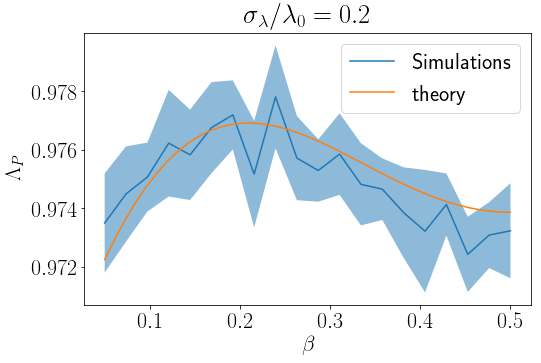

<Figure size 432x288 with 0 Axes>

In [23]:
minval=0
fig=plt.figure(figsize=[8,5])
xv=beta[minval:]
yv=np.mean(temp_output[minval:,:],axis=1)
ystd=np.std(temp_output[minval:,:],axis=1)
plt.plot(xv,yv,label='Simulations')
plt.title(r'$\sigma_\lambda/\lambda_0=0.2$')
plt.fill_between(xv,yv-ystd,yv+ystd,alpha=0.5)
xv1=np.linspace(np.amin(xv),np.amax(xv),40)
# print xv1
yv1=growth(1.0,xv1,par1['lambda_std'],par1['epsilon'])
plt.plot(xv1,yv1,label='theory')
plt.legend()
plt.ylabel(r'$\Lambda_P$')
plt.xlabel(r'$\beta$')
fig.savefig('./important_plots/maximum_growth_rate_simulations.png',bbox_inches='tight',dpi=500)
plt.show()
plt.clf()

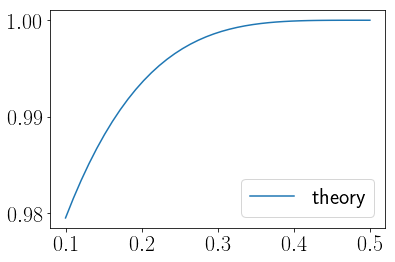

In [140]:
xv1=np.linspace(0.1,0.5,40)
yv1=growth(1.0,xv1,0.0,0.2)
plt.plot(xv1,yv1,label='theory')
plt.legend()
plt.show()

In [128]:
b=0.1
par1['r']=b/(1-b)
init_pop = g.starting_popn(par1)
c, obs = g.discr_time_1(par1, init_pop)

In [138]:
1-par1['epsilon']*(0.1*2-1)**par1['exp_n']

0.91808

0.9180748721170218 0.9180727975222323


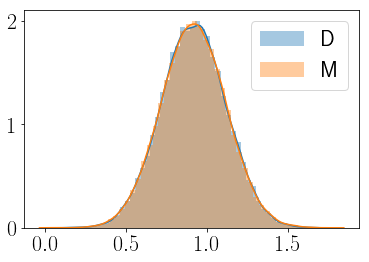

In [137]:
vals = [obj.gr for obj in c[1000:] if obj.celltype==0]
vals1 = [obj.gr for obj in c[1000:] if obj.celltype==1]
sns.distplot(vals,label='D')
sns.distplot(vals1,label='M')
print np.mean(vals), np.mean(vals1)
# plt.xlim(xmin=0.7,xmax=1.3)
plt.legend()
plt.show()

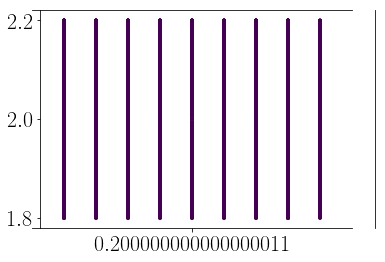

In [132]:
xv=[obj.vb for obj in c[1000:] if obj.celltype==1]
yv=[obj.vd for obj in c[1000:] if obj.celltype==1]
plt.hexbin(x=xv,y=yv)

In [133]:
print np.amax(xv), np.amin(xv)

0.20000000000000015 0.19999999999999987


/home/felix/anaconda2/lib/python2.7/site-packages/numpy/lib/histograms.py:823: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/felix/anaconda2/lib/python2.7/site-packages/numpy/lib/histograms.py:823: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


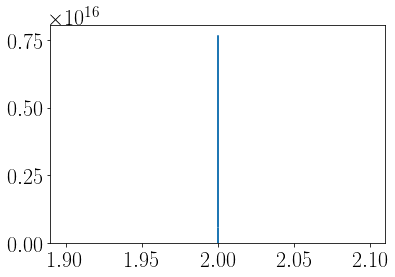

In [104]:
sns.distplot(yv)

In [87]:
par1['lambda_std']

0.2

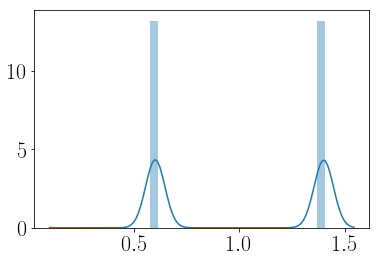

In [71]:
vals=[obj.vb for obj in c]
sns.distplot(vals)